##   *Simple Linear Regression*
 1) Delivery_time -> Predict delivery time using sorting time

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import data
df=pd.read_csv(r"C:\Users\Rustham Sorab\Desktop\Data Science\4.Simple Linear Regression\Raw Data\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# *EDA and DataVisualization*

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
len(df)

21

In [6]:
df.ndim

2

In [7]:
df.shape

(21, 2)

In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
df.dtypes


Delivery Time    float64
Sorting Time       int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [12]:
df.duplicated().sum()

0

In [13]:
 df["Delivery Time"].nunique()

21

In [14]:
#Change column name
df.columns=("Delivery_time","Sorting_time")
df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

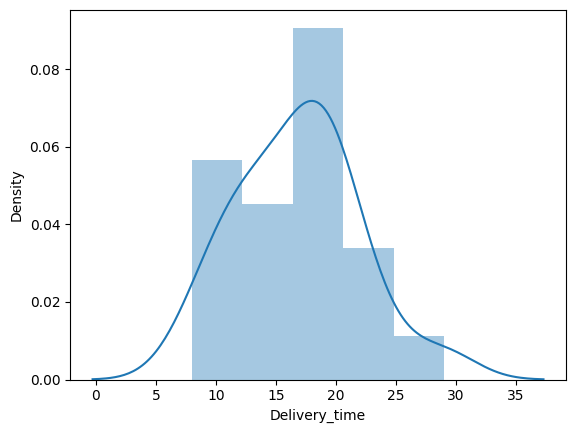

In [15]:
#Visualization
sns.distplot(df.Delivery_time)

<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

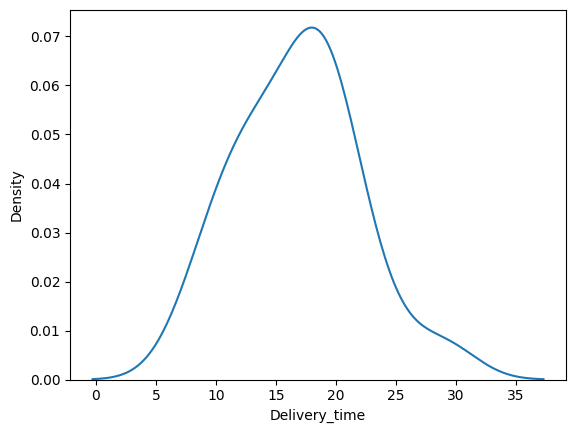

In [16]:
sns.kdeplot(df.Delivery_time)

<AxesSubplot:>

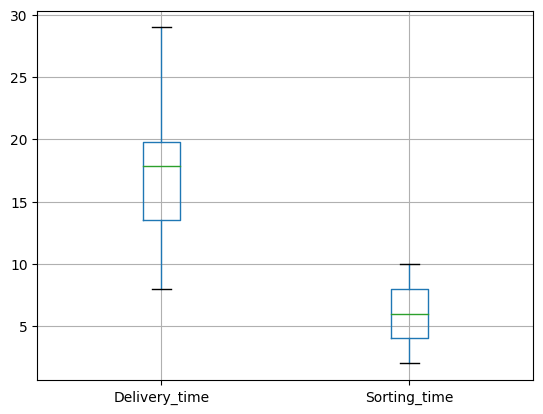

In [17]:
df.boxplot()

In [18]:
np.median(df["Delivery_time"])

17.83

In [19]:
np.mean(df["Delivery_time"]) #median>mean(left Skew)

16.790952380952383

# *Correlation Analysis*

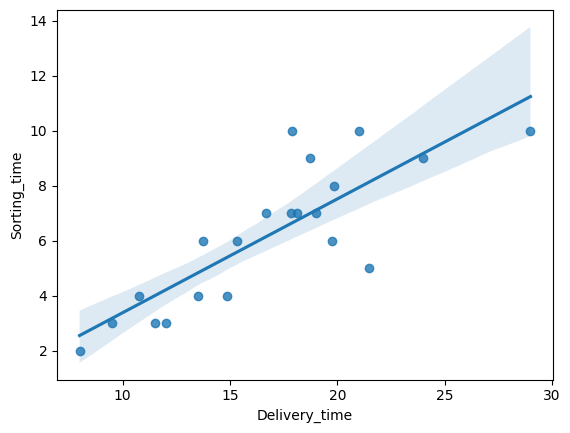

In [20]:

sns.regplot(x="Delivery_time",y="Sorting_time",data=df)
plt.show()

In [21]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<AxesSubplot:>

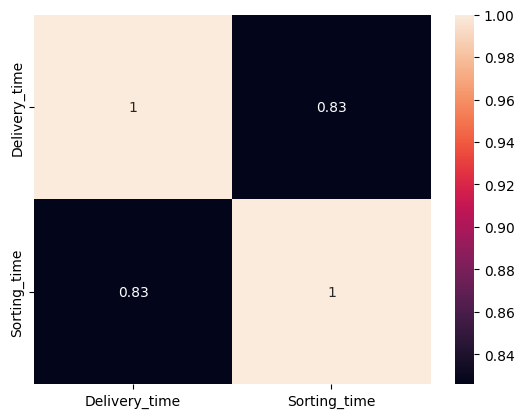

In [22]:
sns.heatmap(df.corr(),annot=True)

# *Model Building and Testing*

In [23]:

#Import Statsmodel
import statsmodels.formula.api as smf

In [24]:
#Fit the model
model=smf.ols("Delivery_time~Sorting_time",data=df).fit()
model

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        22:30:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model.params #slope(B1) and #intercept(Bo)

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [27]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept       3.823349
Sorting_time    6.387447
dtype: float64
P value is
Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [28]:
print(f"rsquared= {model.rsquared},\nAdj.rsquared= {model.rsquared_adj}")

rsquared= 0.6822714748417231,
Adj.rsquared= 0.6655489208860244


In [29]:
#Go for transformation if skewness comes to your dataset
#build models with the help of types of transformations 
model1=smf.ols("np.sqrt(Delivery_time)~np.sqrt(Sorting_time)",data=df).fit()

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 17 Jan 2024   Prob (F-statistic):           8.48e-07
Time:                            22:30:55   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model1.params #slope(B1) and #intercept(Bo)

Intercept                1.613479
np.sqrt(Sorting_time)    1.002217
dtype: float64

In [32]:
print(f"t value is\n{model1.tvalues}\nP value is\n{model1.pvalues}\n")
print(f"rsquared= {model1.rsquared},\nAdj.rsquared= {model1.rsquared_adj}")

t value is
Intercept                4.628248
np.sqrt(Sorting_time)    7.152817
dtype: float64
P value is
Intercept                1.833621e-04
np.sqrt(Sorting_time)    8.475706e-07
dtype: float64

rsquared= 0.7292011987544665,
Adj.rsquared= 0.7149486302678596


In [33]:
model2 = smf.ols('np.cbrt(Delivery_time)~np.cbrt(Sorting_time)' , data=df).fit()
model2

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 17 Jan 2024   Prob (F-statistic):           4.90e-07
Time:                            22:30:55   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model2.params #slope(B1) and #intercept(Bo)

Intercept                1.013571
np.cbrt(Sorting_time)    0.845585
dtype: float64

In [36]:
print(f"t value is\n{model2.tvalues}\nP value is\n{model2.pvalues}\n")
print(f"rsquared= {model2.rsquared}\nAdj.rsquared= {model2.rsquared_adj}")
      

t value is
Intercept                4.900067
np.cbrt(Sorting_time)    7.433210
dtype: float64
P value is
Intercept                9.941770e-05
np.cbrt(Sorting_time)    4.904127e-07
dtype: float64

rsquared= 0.7441167577566272
Adj.rsquared= 0.7306492186911866


In [37]:
model3=smf.ols("np.log(Delivery_time)~np.log(Sorting_time)",data=df).fit()
model3

In [38]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 17 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                           22:30:55   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model3.params #slope(B1) and #intercept(Bo)

Intercept               1.741987
np.log(Sorting_time)    0.597522
dtype: float64

In [40]:
#t value and p value 
print(f"t value is\n{model3.tvalues}\nP value is\n{model3.pvalues}\n")
print(f"rsquared= {model3.rsquared}\nAdj.rsquared= {model3.rsquared_adj}")

t value is
Intercept               13.085552
np.log(Sorting_time)     8.024484
dtype: float64
P value is
Intercept               5.921137e-11
np.log(Sorting_time)    1.601539e-07
dtype: float64

rsquared= 0.77216134926874
Adj.rsquared= 0.7601698413355158


In [41]:
model1_pred =np.square(model1.predict(df['Sorting_time']))
model2_pred =pow(model2.predict(df['Sorting_time']),3)
model3_pred =np.exp(model3.predict(df['Sorting_time']))

In [42]:
#Import Mean_square_error
from sklearn.metrics import mean_squared_error 

In [43]:
model1_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model1_pred))
model2_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model2_pred))
model3_rmse =np.sqrt(mean_squared_error(df['Delivery_time'], model3_pred))


In [44]:
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.934903768890139 
model1= 2.762294279320867 
model2= 2.7555843098935733 
model3= 2.745828897614548


In [45]:
model3.rsquared,model3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

# *Prediction*

In [46]:
# for better prediction model3(by log transformation) is suitable>>>bcz of high rsquared value compare to others & low rmse value
df1=pd.Series([4,10])
df1

0     4
1    10
dtype: int64

In [47]:
df1_pred=pd.DataFrame(df1,columns=['Sorting_time'])
df1_pred

,Sorting_time
0,4
1,10


In [48]:
model3.predict(df1_pred)

0    2.570329
1    3.117833
dtype: float64